In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../Data/titanic_preprocesamiento.csv')
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


In [3]:
# Clasificacion binaria
# 0 - No sobrevivió
# 1 - Sí sobrevivió
X = df.drop('Survived', axis=1)
# quitamos esta columna, porque es la que queremos predecir, la pondremos en la y
X.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0


In [4]:
y = df['Survived']

In [5]:
df['Survived'].value_counts()

Survived
0.0    535
1.0    341
Name: count, dtype: int64

## Regresión logística

* Parte lineal: similar a regresión lineal. Combina linealmente las columnas del dataframe:

z = w0 + w1 * x1 + w2 * x2 + wn * xn

donde w son los pesos

* w0: intercept
* wi: pesos que el modelo aprende, o coeficientes para cada columna

Parte logística (función sigmoide)

sigmoide(z) = 1 / (1 + e^(-z))

Esto nos da un número entre 0 y 1, dando la probabilidad de que se acerque a cada categoría

pertenecer a la clase 0 o 1 que hemos definido

P ( clase = 1 | X)

* SI la probabilidad es mayor a 0.5 entonces se clasifica como clase 1.
* SI la probabilidad es mayor a 0.5 entonces se clasifica como clase 1.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# en realidad no es una regresión, LogisticRegression es un algoritmo de clasificación
# https://the-algorithms.com/es/algorithm/logistic-regression

# particionamos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = LogisticRegression() # entrenamos el modelo
model = LogisticRegression(max_iter=2000, C=0.2) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test) # da las probabilidades de que sea de cada clase, 0 o 1 dentro de la supervivencia

#vemos ahora los falsos positivos y los falsos negativos
print(confusion_matrix(y_test, y_pred)) # así la calculamos y se dibuja con la siguiente celda
#[[98 17]
# [13 48]]
#para verlo aun mejor, por mapa de calor, usamos confusionmatrixdisplay

[[99 16]
 [13 48]]


In [7]:
model.classes_ # da los parámetros 

array([0., 1.])

## Matriz de confusión

Convención práctica (scikit learn)

|                   | **Predicho: 0** | **Predicho: 1** |
|-------------------|-----------------|-----------------|
| **Real: 0**       | 98 (TN)         | 17 (FP)         |
| **Real: 1**       | 13 (FN)          | 48 (TP)         |

Convención teórica

|                   | **Predicho: 1** | **Predicho: 0** |
|-------------------|-----------------|-----------------|
| **Real: 1**       | **True Positive (TP)** | **False Negative (FN)** |
| **Real: 0**       | **False Positive (FP)** | **True Negative (TN)** |

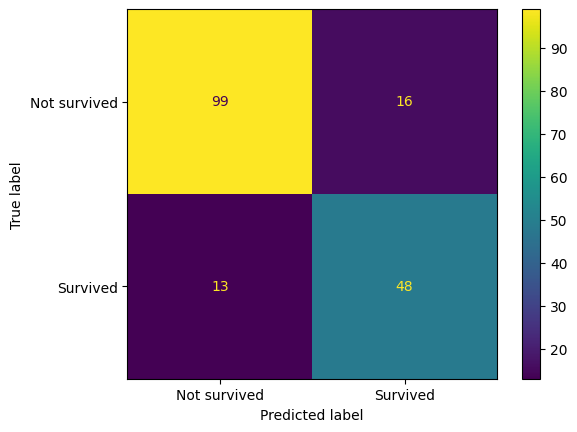

In [8]:
# ahora si hacemos un plot de calor
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not survived', 'Survived'])
cmd.plot();

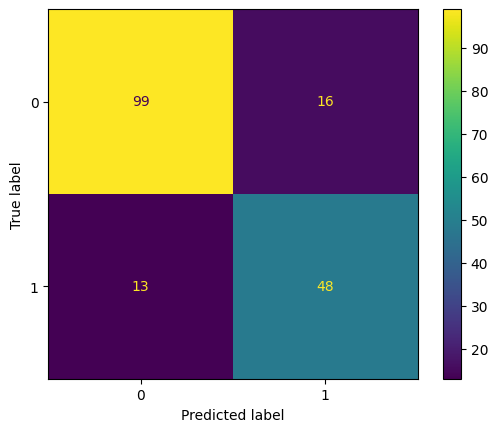

In [9]:
# ahora si hacemos un plot de calor
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

* 98 personas no sobrevivieron, y el modelo predice que no sobreviven (CORRECTO)

Hemos testeado una muestra pequeña

In [10]:
confusion_matrix(y_test, y_pred)

array([[99, 16],
       [13, 48]])

In [11]:
confusion_matrix(y_test, y_pred).ravel()

array([99, 16, 13, 48])

In [12]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('TN, FP, FN, TP: ', TN, FP, FN, TP)

TN, FP, FN, TP:  99 16 13 48


In [13]:
from sklearn.metrics import classification_report

# Para la clase 1 (survived) el modelo tiene peores puntuaciones
#support indica el número de registros filas
#HAY QUE TENER EN CUENTA QUE HEMOS HECHO UN PARTICIONAMIENTO, POR ESO EL NUMERO TOTAL ES MENOR
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       115
         1.0       0.75      0.79      0.77        61

    accuracy                           0.84       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.84      0.84      0.84       176



### Accuracy :

Exactitud: procentaje de muestras que el modelo clasifica correctamente (TN + TP) dividido entre toda la muestra

accuracy = número de aciertos / número total de muestras

In [14]:
# exactitud, ratio de acierto
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
# accuracy: 0.8295454545454546


accuracy: 0.8352272727272727


### Precission:

Precisión: de todAS LAS OBSERVACIONES QUE EL MODELO PREDIJO COMO POSITIVOS, ¿cuántos son realmente positivos?

Precisión : TP / (TP + FP)

### Precision

Precisión: De todas las observaciones que el modelo predijo como positivos, ¿cuántos son realmente positivos?

Enfocada en evitar falsos positivos (FP).

Responde: "De los casos que predije como positivos, ¿qué proporción eran realmente positivos?"

Útil cuando los falsos positivos son costosos, como en detección de spam (es preferible no marcar un correo legítimo como spam).

In [15]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)
# 0.7384615384615385

0.75

### Recall:

Recall o sensibilidad: TP / (TP + FN)


### Recall

Enfocada en evitar falsos negativos (FN).

Responde: "De los casos positivos reales, ¿qué proporción detecté correctamente?"

Útil cuando los falsos negativos son costosos, como en detección de enfermedades (es mejor detectar todos los enfermos, incluso si algunos falsos positivos ocurren).


In [16]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)
# 0.7868852459016393

0.7868852459016393

### f1-score:

Media de precision y recall, tiene en cuenta ambas métricas, proporciona un balance entre ambas.

Es la métrica más confiable cuando teenmos datasets desbalanceados.


In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)
# 0.7619047619047619

0.768

## Índice de Jaccard

Mide la similitud entre las predicciones positivas y los valores 



In [18]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

np.float64(0.6233766233766234)

## ROC-AUC

Curva ilustrar el rendimiento del clasificador en distintos umbrales

* TPR: True Positive Ratio
* FPR: Flase Positive Ratio

TPR = 1, FPR=0, es lo ideal

AUC: Area Under the curve cuantifica el área debajo de la curva

* AUC = 1 perfecto
* AUC = 0.5 malo, igual que tomar una decisión aleatoria
* AUC < 0.5 peor que aleatorio, posible problema con el modelo


In [19]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred) # np.float64(0.8195295794725588)
print(f'AUC {auc}')

AUC 0.8238774055595153


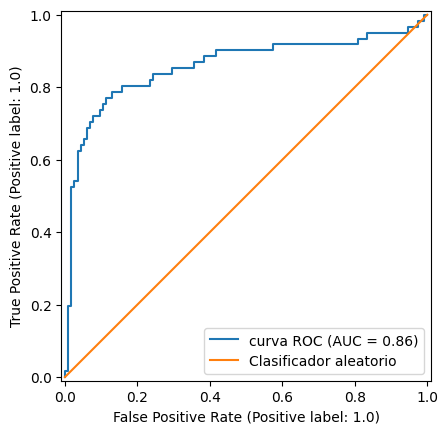

In [20]:
from sklearn.metrics import RocCurveDisplay

# Gráfico que muestra qué tan bien el modelo diferencia entre las clases
# Eje x: FPR tasa de falsos positivos
# Eje y: TPR tasa de verdaderos positivos
# Nos interesa que la diagonal esté entre (0,0) y (1,1) y 
# lo haga lo más recto posible (haciendo el angulo de 90 y llegan de (0.0) a (0,1))
# FPR si es 0 es ideal, cuanto mayor FPR pero y más curva se hace la línea
# TPR es 1 es ideal
# INTERPRETACIÓN cuanto más cerca de la esqueno superior izquierda, mejor
RocCurveDisplay.from_estimator(model, X_test, y_test, name='curva ROC')
plt.plot([0,1], [0,1], label='Clasificador aleatorio')
plt.legend()


In [21]:
model.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [22]:
model.predict_proba(X_test)

array([[0.3026909 , 0.6973091 ],
       [0.8486708 , 0.1513292 ],
       [0.65005316, 0.34994684],
       [0.8742781 , 0.1257219 ],
       [0.81973116, 0.18026884],
       [0.10962072, 0.89037928],
       [0.83377094, 0.16622906],
       [0.57245842, 0.42754158],
       [0.89774495, 0.10225505],
       [0.57420371, 0.42579629],
       [0.3998182 , 0.6001818 ],
       [0.40456975, 0.59543025],
       [0.75910754, 0.24089246],
       [0.5738596 , 0.4261404 ],
       [0.78489394, 0.21510606],
       [0.42723275, 0.57276725],
       [0.54445547, 0.45554453],
       [0.57224226, 0.42775774],
       [0.31157651, 0.68842349],
       [0.14319529, 0.85680471],
       [0.83593471, 0.16406529],
       [0.86425213, 0.13574787],
       [0.80099098, 0.19900902],
       [0.3474469 , 0.6525531 ],
       [0.9183904 , 0.0816096 ],
       [0.89231487, 0.10768513],
       [0.85072325, 0.14927675],
       [0.38192007, 0.61807993],
       [0.43918288, 0.56081712],
       [0.86252466, 0.13747534],
       [0.

In [23]:
model.classes_

array([0., 1.])

In [24]:
# Hacer predicr sobre un pasajero ficticio y saber a qué clase pertenece
# una nueva persona, por ejemplo "Pepe"
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
X_new

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0


In [25]:
model.predict(X_new) # 1

array([0.])

In [26]:
# 87,5 % de probabilidad de que no haya sobrevivido
# 12,42 % de probabilidad de que sí haya sobrevivido
model.predict_proba(X_new) 

array([[0.85944892, 0.14055108]])

In [27]:
model.intercept_

array([3.17424311])

In [28]:
model.coef_

array([[-0.04799952, -1.01726433, -0.3566783 , -0.1112087 , -0.00216403,
         1.14718709, -1.14140647,  0.39639309, -0.10436136,  0.06498837,
        -0.11191646]])

## Comparar modelos clasificación

In [29]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])

def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]
    
    

In [30]:
model  = LogisticRegression(max_iter=1000, C=1) # por defecto C=1
calculate_metrics('RLog', model)
df_resultados # para regresión logística

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.81953


In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) # el valor por defecto es 5
calculate_metrics('KNN k = 3', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237


In [32]:
model = KNeighborsClassifier(n_neighbors=5) # el valor por defecto es 5
calculate_metrics('KNN k = 5', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869


k: 2, Acurracy. 0.7840909090909091, error: 0.21590909090909094
k: 3, Acurracy. 0.7045454545454546, error: 0.2954545454545454
k: 4, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 5, Acurracy. 0.75, error: 0.25
k: 6, Acurracy. 0.7897727272727273, error: 0.2102272727272727
k: 7, Acurracy. 0.7784090909090909, error: 0.22159090909090906
k: 8, Acurracy. 0.7840909090909091, error: 0.21590909090909094
k: 9, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 10, Acurracy. 0.7784090909090909, error: 0.22159090909090906
k: 11, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 12, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 13, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 14, Acurracy. 0.7670454545454546, error: 0.23295454545454541
k: 15, Acurracy. 0.7840909090909091, error: 0.21590909090909094
k: 16, Acurracy. 0.7954545454545454, error: 0.20454545454545459
k: 17, Acurracy. 0.7784090909090909, error: 0.22159090909090906
k: 18, Acurracy

Text(0.5, 0, 'k n_neighbors')

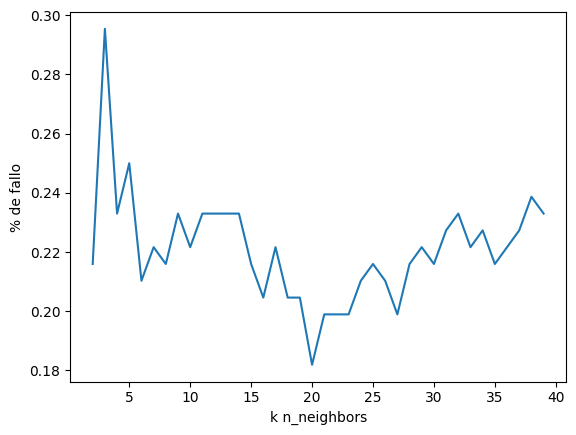

In [33]:
# elbow method o el metodo del codo

list_accuracy = list()
errors = []
for k in range(2, 40):
    # Modelo
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Metricas
    accuracy = accuracy_score(y_test, y_pred)
    list_accuracy.append([k, accuracy])
    error = 1 - accuracy
    errors.append(error)
    print(f"k: {k}, Acurracy. {accuracy}, error: {error}")
    
plt.plot(range(2, 40), errors)
plt.ylabel('% de fallo')
plt.xlabel('k n_neighbors')    

In [34]:
# por método del codo, n_neigbors = 20 es el mejor
model = KNeighborsClassifier(n_neighbors=20) # el valor por defecto es 5
calculate_metrics('KNN k = 20', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496


## Árbol de decisión

Parámetros:

* criterion:
    * gini (por defecto)
        * Gini = 0 significa que el nodo del árbol es completatmente puro, contiene datos de una sola clase
        * Gini > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor, mayor será la impureza
        * Gini es una medida de impureza o mezcla de clases en un nodo de un árbol. Porpósito: evaluar qué tan puras son las divisiones en un nodo.
    * entropy:
        * Entropy = 0  significa que el nodo es completamente puro, contiene datos de uan sola clase
        * Entropy > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor, mayor será la impureza o la incertidumbre
        * Entropy es una medida de incertidumbre o desorden en un nodo de un árbol.
        * Más lento, pero puede ser útil cuando las clases están desbalanceadas.
* max_depth
* min_samples_split: número de muestras que debe haber en un nodo hijo
* min_samples_split: Mínimo de muestrtas que debe haber en un nodo hijo
* max_features: número máximo de columnas X consideradas en........


Atributos:

feature_importances_ (son atributos privados pero se pueden consultar y extraer)

* feature_importances_ : importancia de cada columna en la X a la hora de hacer la partición, se calcula usando la impureza.
* classes_
* tree_
* get_depth() saca el largo máximo desde el nodo raíz al nodo hoja

In [35]:
# Árboles
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # por defecto usa 'gini' que mira lo entremezclados que estén los datos
calculate_metrics('DT', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987


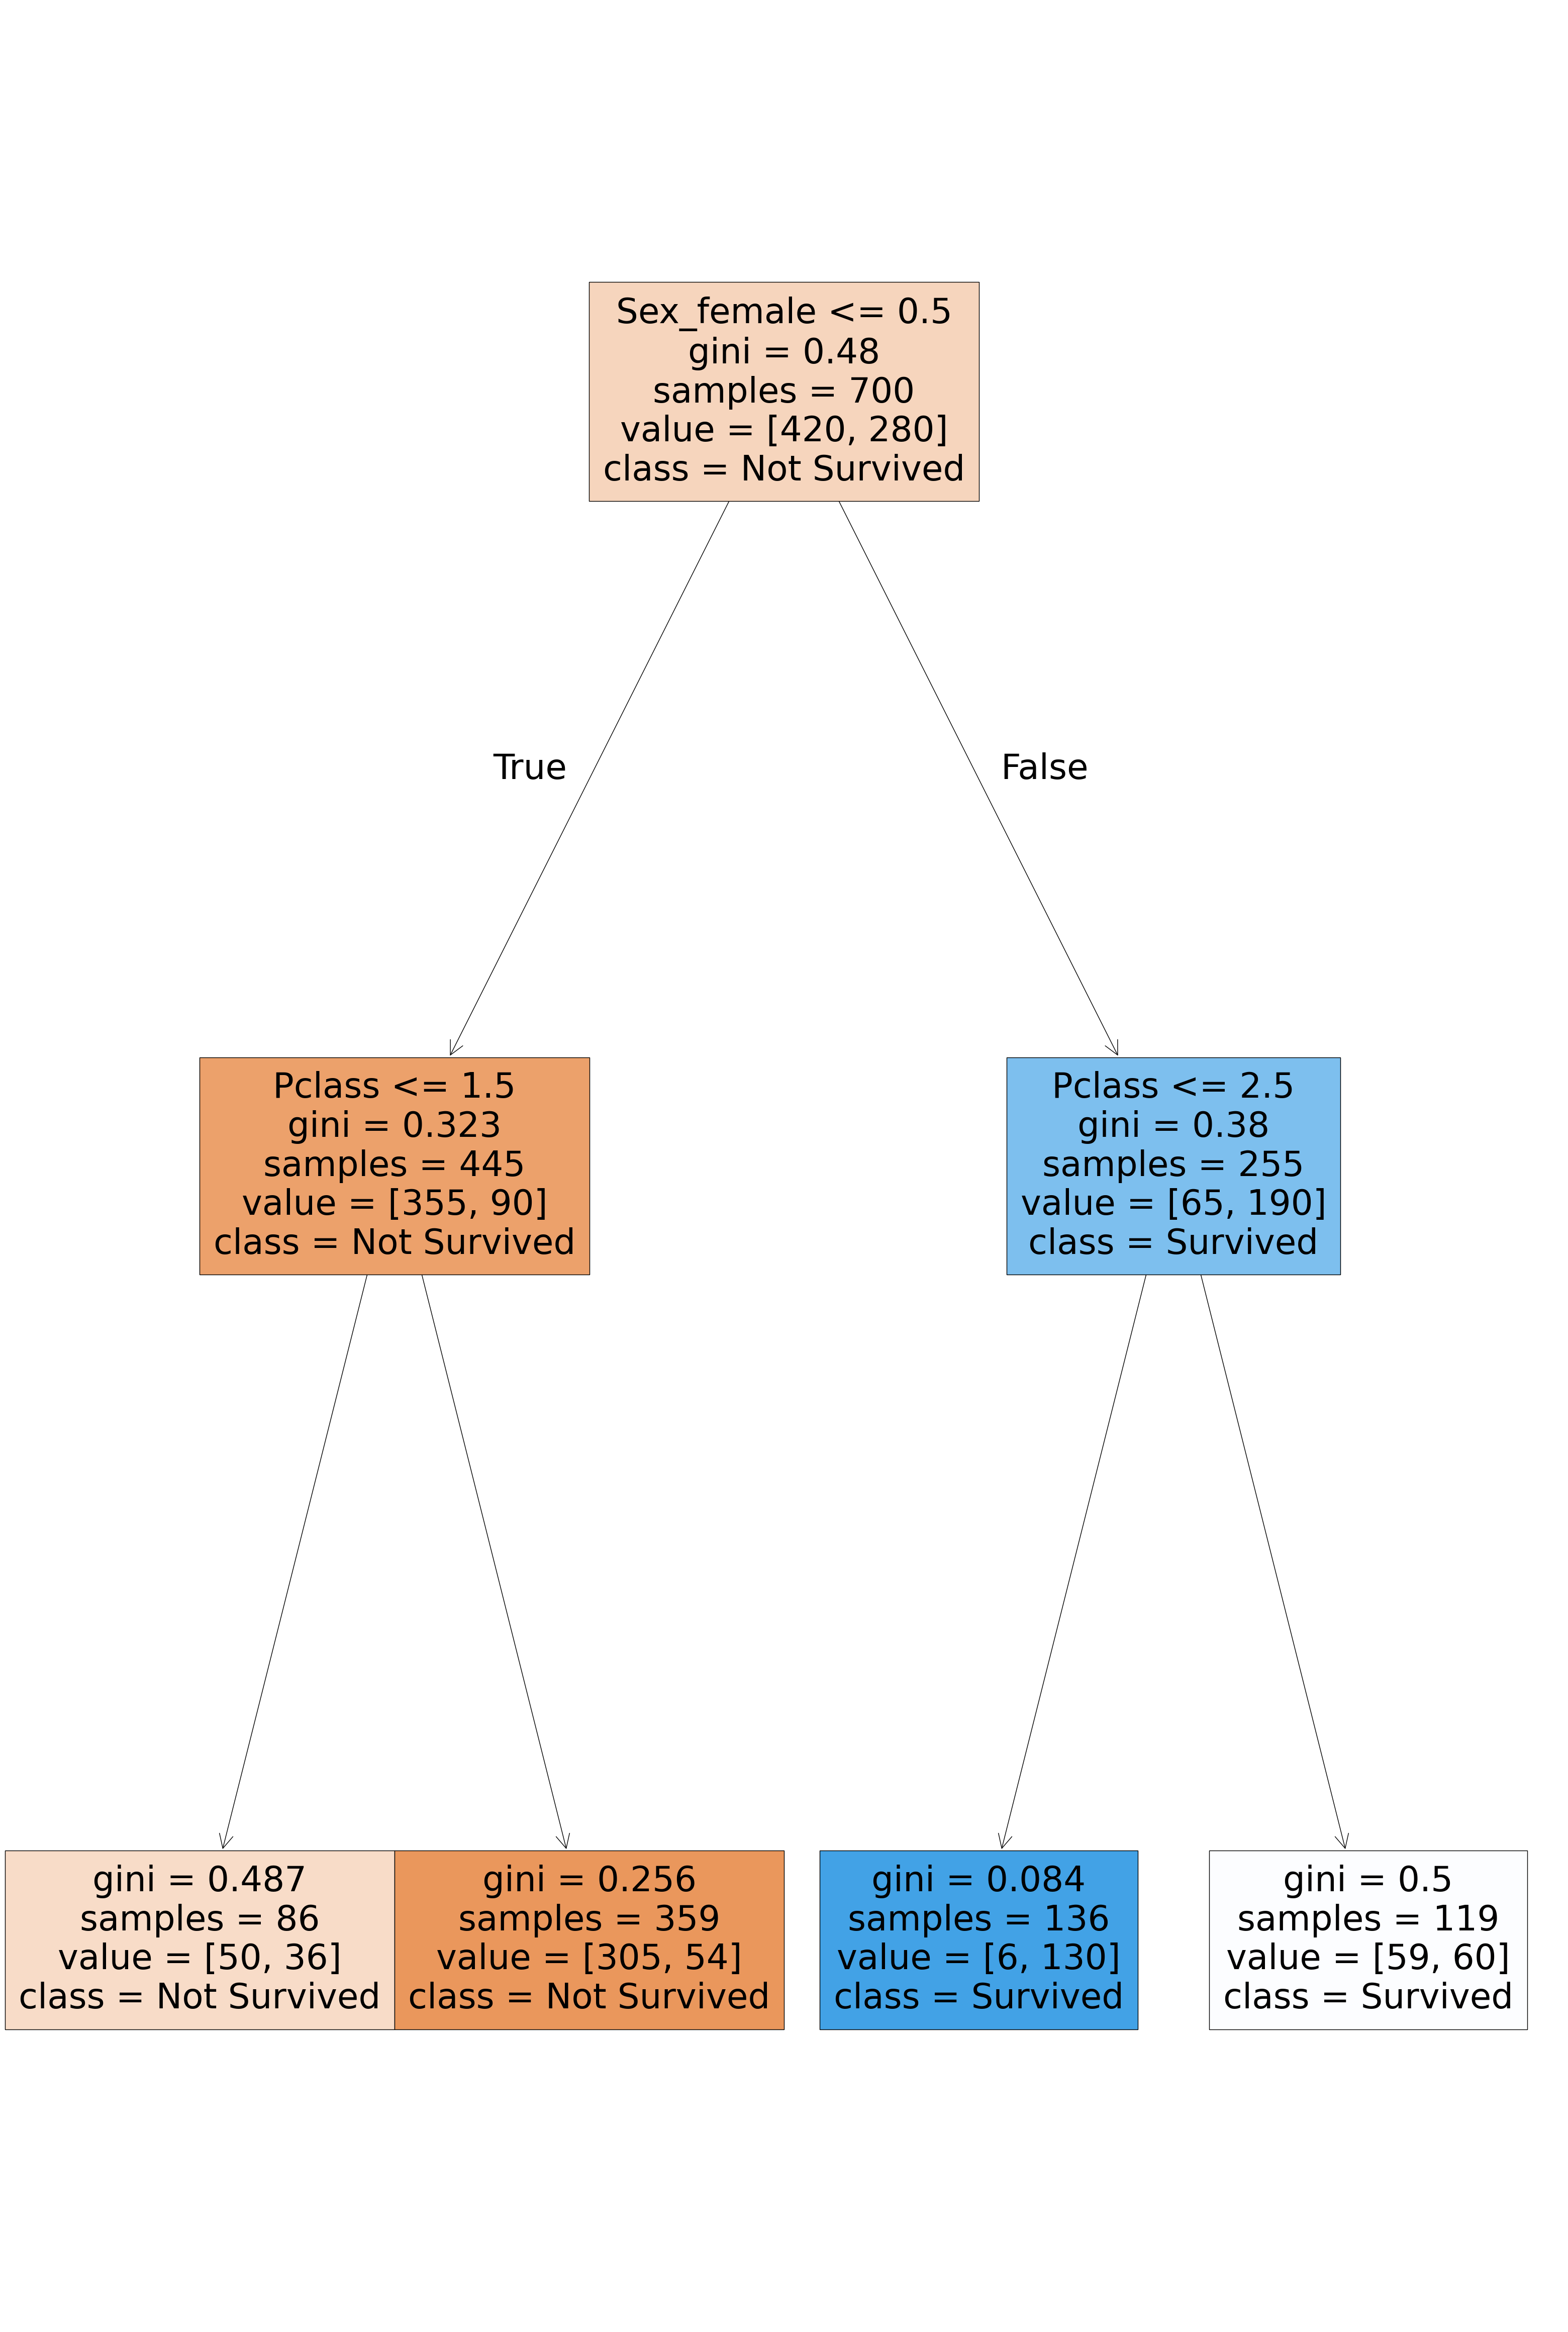

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 60))
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
plot_tree(model, filled=True, class_names=['Not Survived', 'Survived'], feature_names=X.columns);

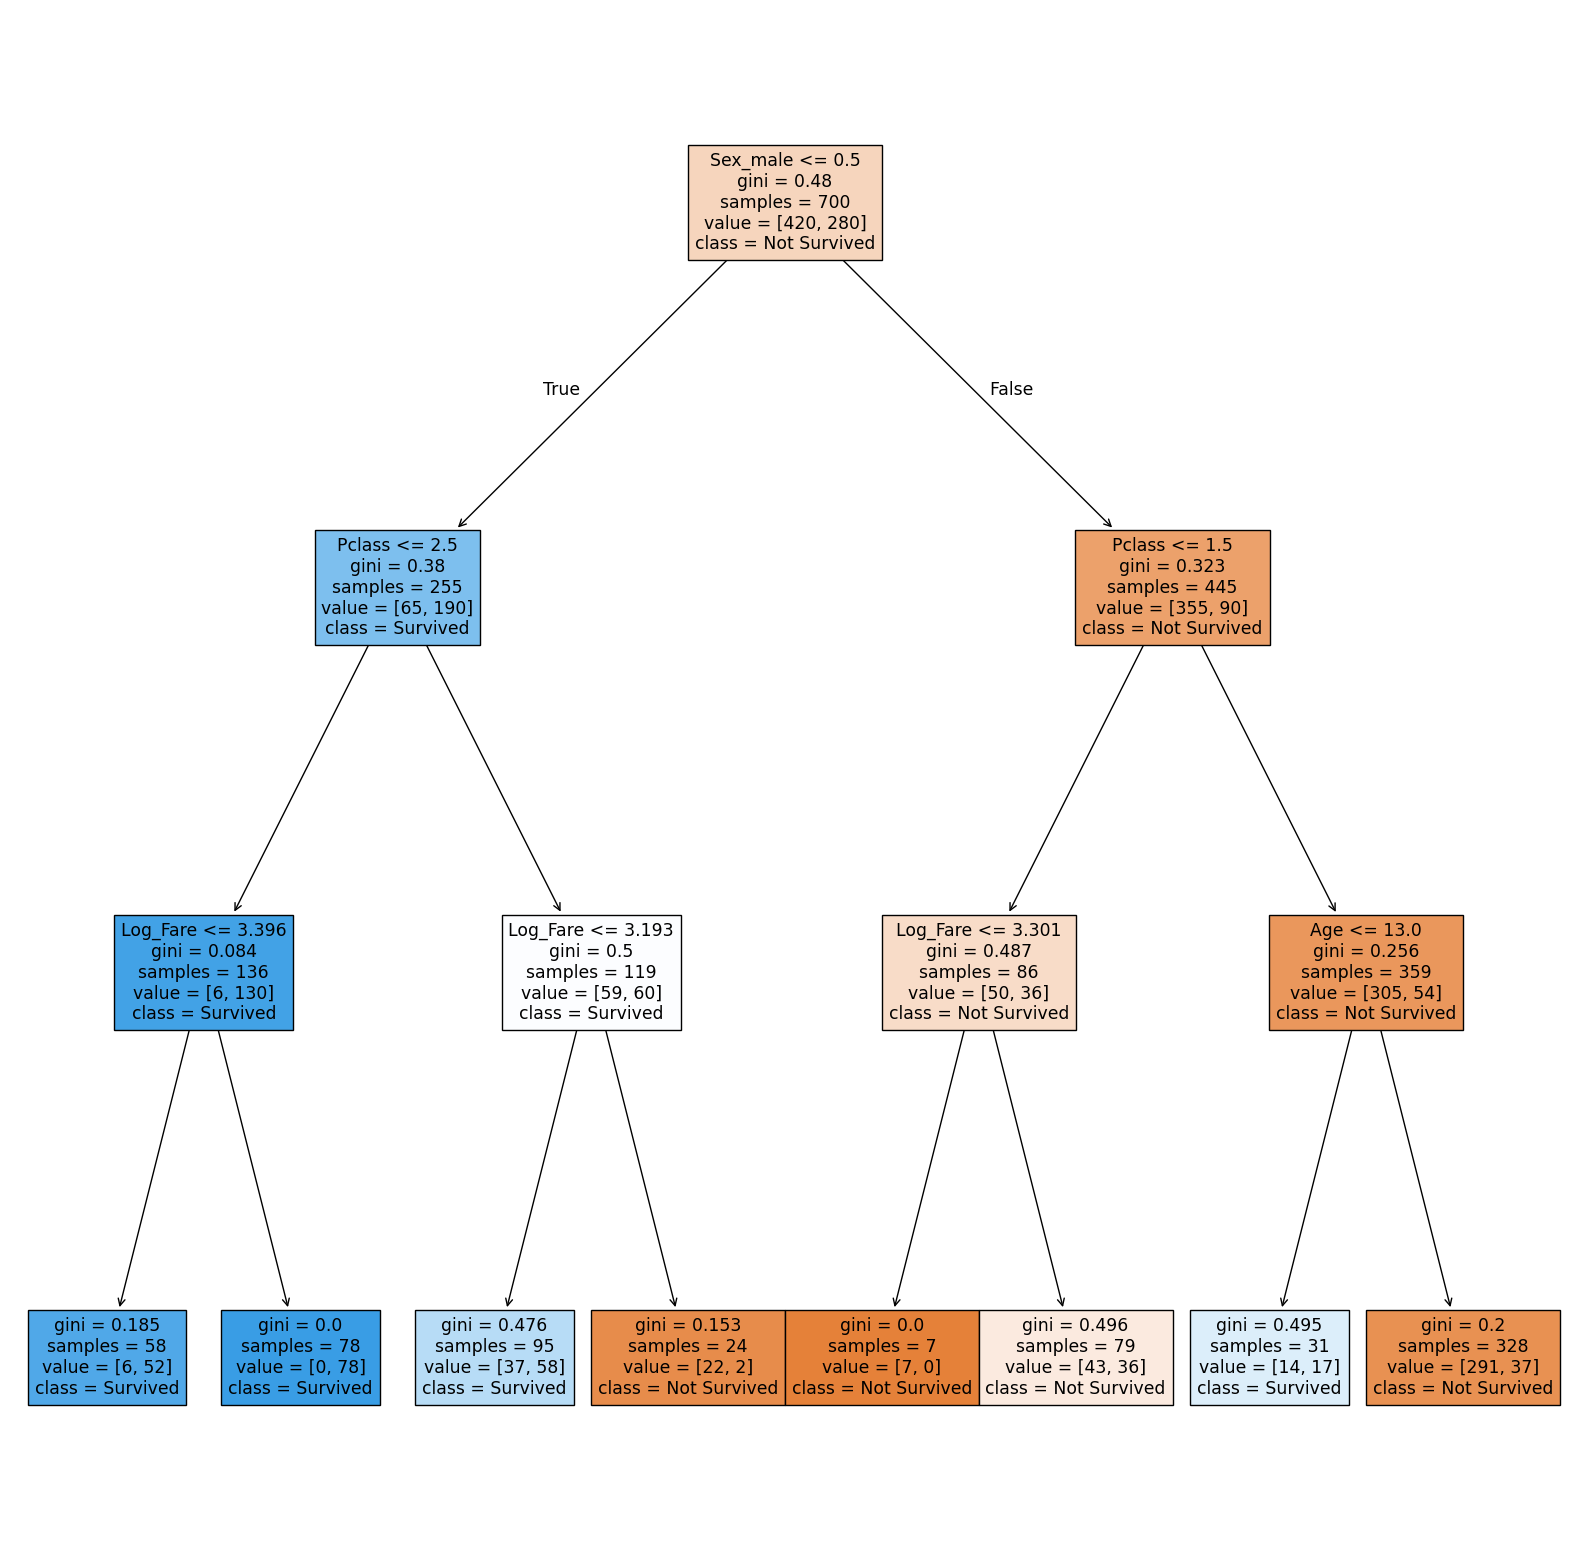

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
plot_tree(model, filled=True, class_names=['Not Survived', 'Survived'], feature_names=X.columns);

In [38]:
# un array con una impoortance por cada columna en X
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")
    
#model.feature_importances_

Columna: Age Importancia: 0.06880724888664776
Columna: Pclass Importancia: 0.22968529262971887
Columna: Ticket Importancia: 0.0
Columna: Sibsp Importancia: 0.0
Columna: Parch Importancia: 0.0
Columna: Sex_female Importancia: 0.0
Columna: Sex_male Importancia: 0.6116683545505839
Columna: Log_Fare Importancia: 0.08983910393304943
Columna: Embark_Town_Cherbourg Importancia: 0.0
Columna: Embark_Town_Queenstown Importancia: 0.0
Columna: Embark_Town_Southampton Importancia: 0.0


In [39]:
model = DecisionTreeClassifier(criterion='entropy')
calculate_metrics('DT entropy', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852


In [40]:
model = DecisionTreeClassifier(max_depth=10)
calculate_metrics('DT depth 10', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029


In [41]:
model = DecisionTreeClassifier(max_depth=11)
calculate_metrics('DT depth 11', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136


In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
calculate_metrics('RF', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029


In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)
calculate_metrics('RF 50', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
calculate_metrics('RF 500', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
calculate_metrics('RF 200 mss 40', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=10)
calculate_metrics('RF 200 mss 10', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [47]:
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.17284660149093495
Columna: Pclass Importancia: 0.12197408047087367
Columna: Ticket Importancia: 0.0707119575174912
Columna: Sibsp Importancia: 0.02836461723015849
Columna: Parch Importancia: 0.02623962724803537
Columna: Sex_female Importancia: 0.1877157459827527
Columna: Sex_male Importancia: 0.17329745707915378
Columna: Log_Fare Importancia: 0.1827365897435351
Columna: Embark_Town_Cherbourg Importancia: 0.008469627594388381
Columna: Embark_Town_Queenstown Importancia: 0.01341617440519379
Columna: Embark_Town_Southampton Importancia: 0.014227521237482423


## svc

son las máquinas de soporte vectorial, pero para multicolumna

C penalizaciónm por errores.

C grande penaliza fuertemente errore, lo que implicará un margen más pequeño ya que intenta clasificar todos los puntos correctamente.

C pequeño permite clasificaciones incorrectas o puntos dentro del maren para obtener un margen más amplio y que generalice mejor.



In [48]:
from sklearn.svm import SVC

model = SVC()
calculate_metrics('SVC 1', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [50]:
model = SVC(C=0.1)
calculate_metrics('SVC 0.1', model)
df_resultados


c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [51]:
model = SVC(C=100)
calculate_metrics('SVC 100', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [52]:
model = SVC(C=1000)
calculate_metrics('SVC 1000', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


In [53]:
model = SVC(C=8)
calculate_metrics('SVC 8', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.806818,0.690141,0.803279,0.742424,0.805987
5,DT entropy,0.778409,0.661765,0.737705,0.697674,0.768852
6,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
7,DT depth 11,0.818182,0.730159,0.754098,0.741935,0.803136
8,RF,0.835227,0.758065,0.770492,0.764228,0.820029
9,RF 50,0.818182,0.723077,0.770492,0.746032,0.806985


## Exportar el modelo final

Viendo los resultados, el model RandomForest es el mejor

In [54]:
# lo exportamos!
from joblib import dump, load

model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
model.fit(X, y)

RandomForestClassifier(min_samples_split=20, n_estimators=200)

In [55]:
# exportar el modelo
dump(model, 'clasificador_titanic_rf.joblib')

['clasificador_titanic_rf.joblib']

In [56]:
# importar el modelo
# este load lo haríamos en una aplicación web, con Python, para desplegar en un servidor
model = load('clasificador_titanic_rf.joblib')

In [57]:
# predicción
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
model.predict(X_new)

array([0.])

Librerías para exportar y cargar modelos:
    
* joblib: específica para serializar grandes objetos Python como modelos ML.
* pickle: hace archivos .pkl, es más genérico, no solo para modelos ML, también para datos numéricos, integrado en Python. Más lento que joblib para arrays grandes de Numpy y no comprime datos por defecto.
* hdf5 es un formato que genera archivos .h5 más ideal para modelos de TensorFlow/Keras

    
    

In [49]:
# clasificación multiclase